In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
files = pd.read_csv('../data/extractions/mriqc_extraction.csv')
X = files.iloc[:, 2:].values
Y = files.iloc[:, 1].values

print(files)

         date                                         filesuffix        tsnr  \
0    20161128       -20161128_task-rest_acq-p2Xs4X35mm_bold.json  230.103912   
1    20161128               -20161128_task-rest_acq-p2_bold.json  239.879349   
2    20161128      -20161128_task-rest_acq-p2_rec-moco_bold.json  239.181503   
3    20161205       -20161205_task-rest_acq-p2Xs4X35mm_bold.json  226.028854   
4    20161205               -20161205_task-rest_acq-p2_bold.json  245.208572   
5    20161205      -20161205_task-rest_acq-p2_rec-moco_bold.json  243.498505   
6    20161212       -20161212_task-rest_acq-p2Xs4X35mm_bold.json  228.845230   
7    20161212               -20161212_task-rest_acq-p2_bold.json  205.039551   
8    20161212      -20161212_task-rest_acq-p2_rec-moco_bold.json  207.309174   
9    20161219       -20161219_task-rest_acq-p2Xs4X35mm_bold.json  207.193359   
10   20161219               -20161219_task-rest_acq-p2_bold.json  223.930527   
11   20161219      -20161219_task-rest_a

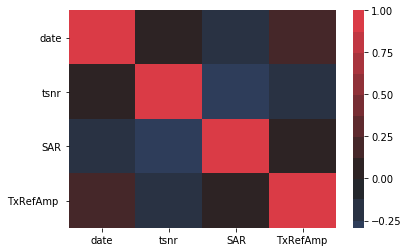

In [15]:
sns.heatmap(files.corr(), cmap=sns.diverging_palette(h_neg=256, h_pos=10, n=16, sep=1, center="dark"), center=0)

In [269]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()

In [6]:
X = X[1:]

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [271]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [272]:
y_pred = regressor.predict(X_test)
y_pred

array([250.82626208, 250.87705344, 233.85287582, 247.14345726,
       250.81758142, 244.74670452, 233.79502239, 241.8678562 ,
       233.81760956, 250.79681773, 233.89744478, 250.80561898,
       233.77573415, 233.69169168, 233.73930714, 237.84731683])

In [273]:
print(regressor.coef_)
print(regressor.intercept_)

[   0.         -490.18360608]
261.07633804014586


In [274]:
from sklearn.metrics import r2_score

In [275]:
r2_score(y_test, y_pred)

-0.13461720069271044

In [258]:
regressor.score(X_test, y_pred)

1.0

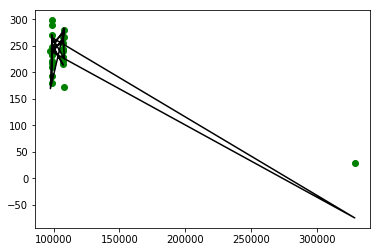

In [260]:
plt.scatter(X_test[:,3], y_test,color='g')
plt.plot(X_test[:,3], y_pred, color='k')
plt.show()

In [169]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
    print("TRAIN:" + str(train_index) + "TEST:" + str(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN:[39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]TEST:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
TRAIN:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]TEST:[39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]


ValueError: x and y must be the same size

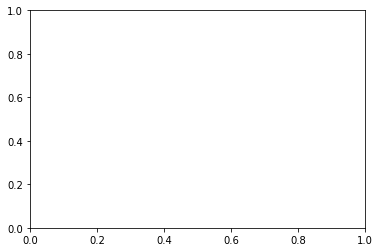

In [170]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

hello = cross_val_predict(regressor, X, Y, cv=6)
plt.scatter(X_test[:,1], hello)
plt.plot(X_test[:,1], hello, color='r')

In [106]:
r2_score(Y, hello)

0.21197210331800898

In [109]:
print(hello)
print(X)

[249.30333163 256.09253582 258.10899431 263.63807759 249.32148363
 256.09936169 236.78093203 243.53851507 254.39670299 261.1458854
 248.86820573 248.86820573 253.13705563 261.43938536 250.77110098
 261.23220689 248.58537183 259.11071568 249.77804731 260.51261193
 250.26931423 260.75472135 250.06131052 260.76352704 248.788973
 259.3316749  248.05602115 256.79476407 248.9191348  257.69768961
 248.93140441 257.59931206 248.91884778 257.69758154 250.89090638
 258.37486985 249.46691706 258.12199675 249.14160201 264.96465353
 246.305444   256.9494846  253.57082755 264.23292894 253.53517729
 264.21952241 251.39643797 262.04986001 249.17306759 259.8483737
 252.775297   262.74920813 249.03690597 264.9222215  248.7641788
 264.6108378  246.95446549 262.88617628 249.62626405 265.22681877
 194.55354029 184.58962501 200.507735   195.34666912 186.87148411
 152.13080215 200.71025217 190.0384962  206.12360052 208.58511756
 199.21052044 213.14598044 203.33233821 194.25621794 207.87500469
 145.11801831 1

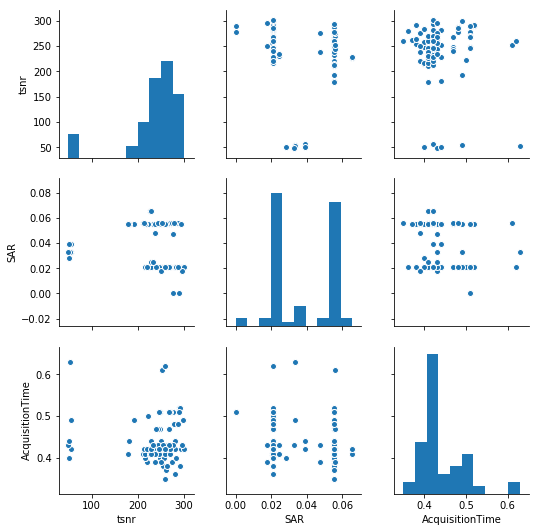

In [200]:
sns.pairplot(files)

In [261]:
import numpy as np
import statsmodels.api as sm
files = pd.read_csv('extraction.csv')
X = files.iloc[:, 2:].values
Y = files.iloc[:, 1].values

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [264]:
df2=pd.DataFrame(X,columns=['SAR','AT'])
df2['tsnr']=pd.Series(Y)
df2

,SAR,AT,tsnr
0,0.055718,0.42,247.676819
1,0.020951,0.42,281.640381
2,0.055695,0.35,259.791901
3,0.020943,0.36,279.601837
4,0.055625,0.42,264.461914
5,0.020917,0.42,263.224304
6,0.055458,0.52,288.716065
7,0.020854,0.52,291.626343
8,0.055389,0.38,253.758545
9,0.020828,0.38,291.835113


In [265]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
model = smf.ols(formula='tsnr ~ SAR + AT', data=df2)
results_formula = model.fit()
results_formula.params

Intercept    295.100939
SAR         -406.243792
AT           -96.521877
dtype: float64

In [267]:
x_surf, y_surf = np.meshgrid(np.linspace(df2["SAR"].min(), df2["SAR"].max(), 100),np.linspace(df2["AT"].min(), df2["AT"].max(), 100))
onlyX = pd.DataFrame({'SAR': x_surf.ravel(), 'AT': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


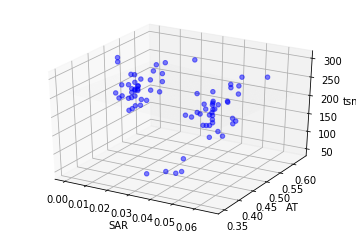

In [268]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['SAR'],df2['AT'],df2['tsnr'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='None', alpha=0.01)
ax.set_xlabel('SAR')
ax.set_ylabel('AT')
ax.set_zlabel('tsnr')
plt.show()